# Diamonds Price Prediction 

### Steps:
    - Understand our data: variable characteristics, measures, etc
    - The objective: diamonds price prediction
    - Clean data: check for nulls, invalid data, etc
    - Scale data: if needed
    - Split data: train-test
    - Fit & predict models: use different models
    - Test results: test different models results
    - Apply best model: apply trained best model to new data


### 1-IMPORTING LIBRARIES

In [45]:
# Importing all needed laibraries
import numpy as np
import pandas as pd

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OrdinalEncoder 
from sklearn.model_selection import train_test_split



### 2- Get the Data

In [46]:
daimond = pd.read_csv("/content/drive/MyDrive/shai/train.csv")
test = pd.read_csv("/content/drive/MyDrive/shai/test.csv")

### 3- Discover and visualize the data

## A- Data discovery

In [47]:
daimond.head(5)

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [90]:
daimond.shape

(43112, 12)

In [92]:
daimond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43112 entries, 0 to 43151
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43112 non-null  int64  
 1   carat    43112 non-null  float64
 2   cut      43112 non-null  int64  
 3   color    43112 non-null  int64  
 4   clarity  43112 non-null  int64  
 5   depth    43112 non-null  float64
 6   table    43112 non-null  float64
 7   price    43112 non-null  int64  
 8   x        43112 non-null  float64
 9   y        43112 non-null  float64
 10  z        43112 non-null  float64
 11  volume   43112 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 4.3 MB


In [49]:
daimond.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [50]:
daimond["cut"].unique()

array(['Ideal', 'Premium', 'Very Good', 'Fair', 'Good'], dtype=object)

In [51]:
daimond["clarity"].unique()

array(['SI2', 'VVS2', 'VS2', 'IF', 'VS1', 'SI1', 'VVS1', 'I1'],
      dtype=object)

In [52]:
daimond["color"].unique()

array(['I', 'G', 'F', 'H', 'D', 'E', 'J'], dtype=object)

In [53]:
daimond["cut"].value_counts()


Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64

In [54]:
daimond["clarity"].value_counts()

SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64

In [55]:
daimond["color"].value_counts()

G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: color, dtype: int64

B- Data visualization

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-57-ced23669ae3a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(daimond.corr())
<ipython-input-57-ced23669ae3a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(daimond.corr(), annot=True)


             Id     carat     depth     table     price         x         y  \
Id     1.000000  0.001141 -0.000776 -0.000739 -0.001111 -0.000519  0.001660   
carat  0.001141  1.000000  0.023944  0.182889  0.921911  0.975760  0.947060   
depth -0.000776  0.023944  1.000000 -0.302794 -0.013137 -0.029601 -0.033354   
table -0.000739  0.182889 -0.302794  1.000000  0.128501  0.197342  0.184310   
price -0.001111  0.921911 -0.013137  0.128501  1.000000  0.885181  0.861354   
x     -0.000519  0.975760 -0.029601  0.197342  0.885181  1.000000  0.968954   
y      0.001660  0.947060 -0.033354  0.184310  0.861354  0.968954  1.000000   
z     -0.000981  0.948923  0.090834  0.150746  0.857665  0.965677  0.942670   

              z  
Id    -0.000981  
carat  0.948923  
depth  0.090834  
table  0.150746  
price  0.857665  
x      0.965677  
y      0.942670  
z      1.000000  


<Axes: >

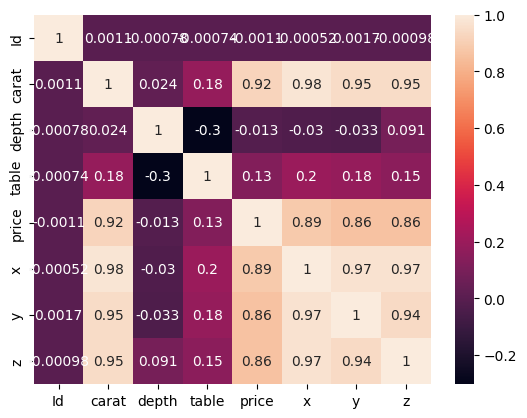

In [57]:
print(daimond.corr())
sns.heatmap(daimond.corr(), annot=True)

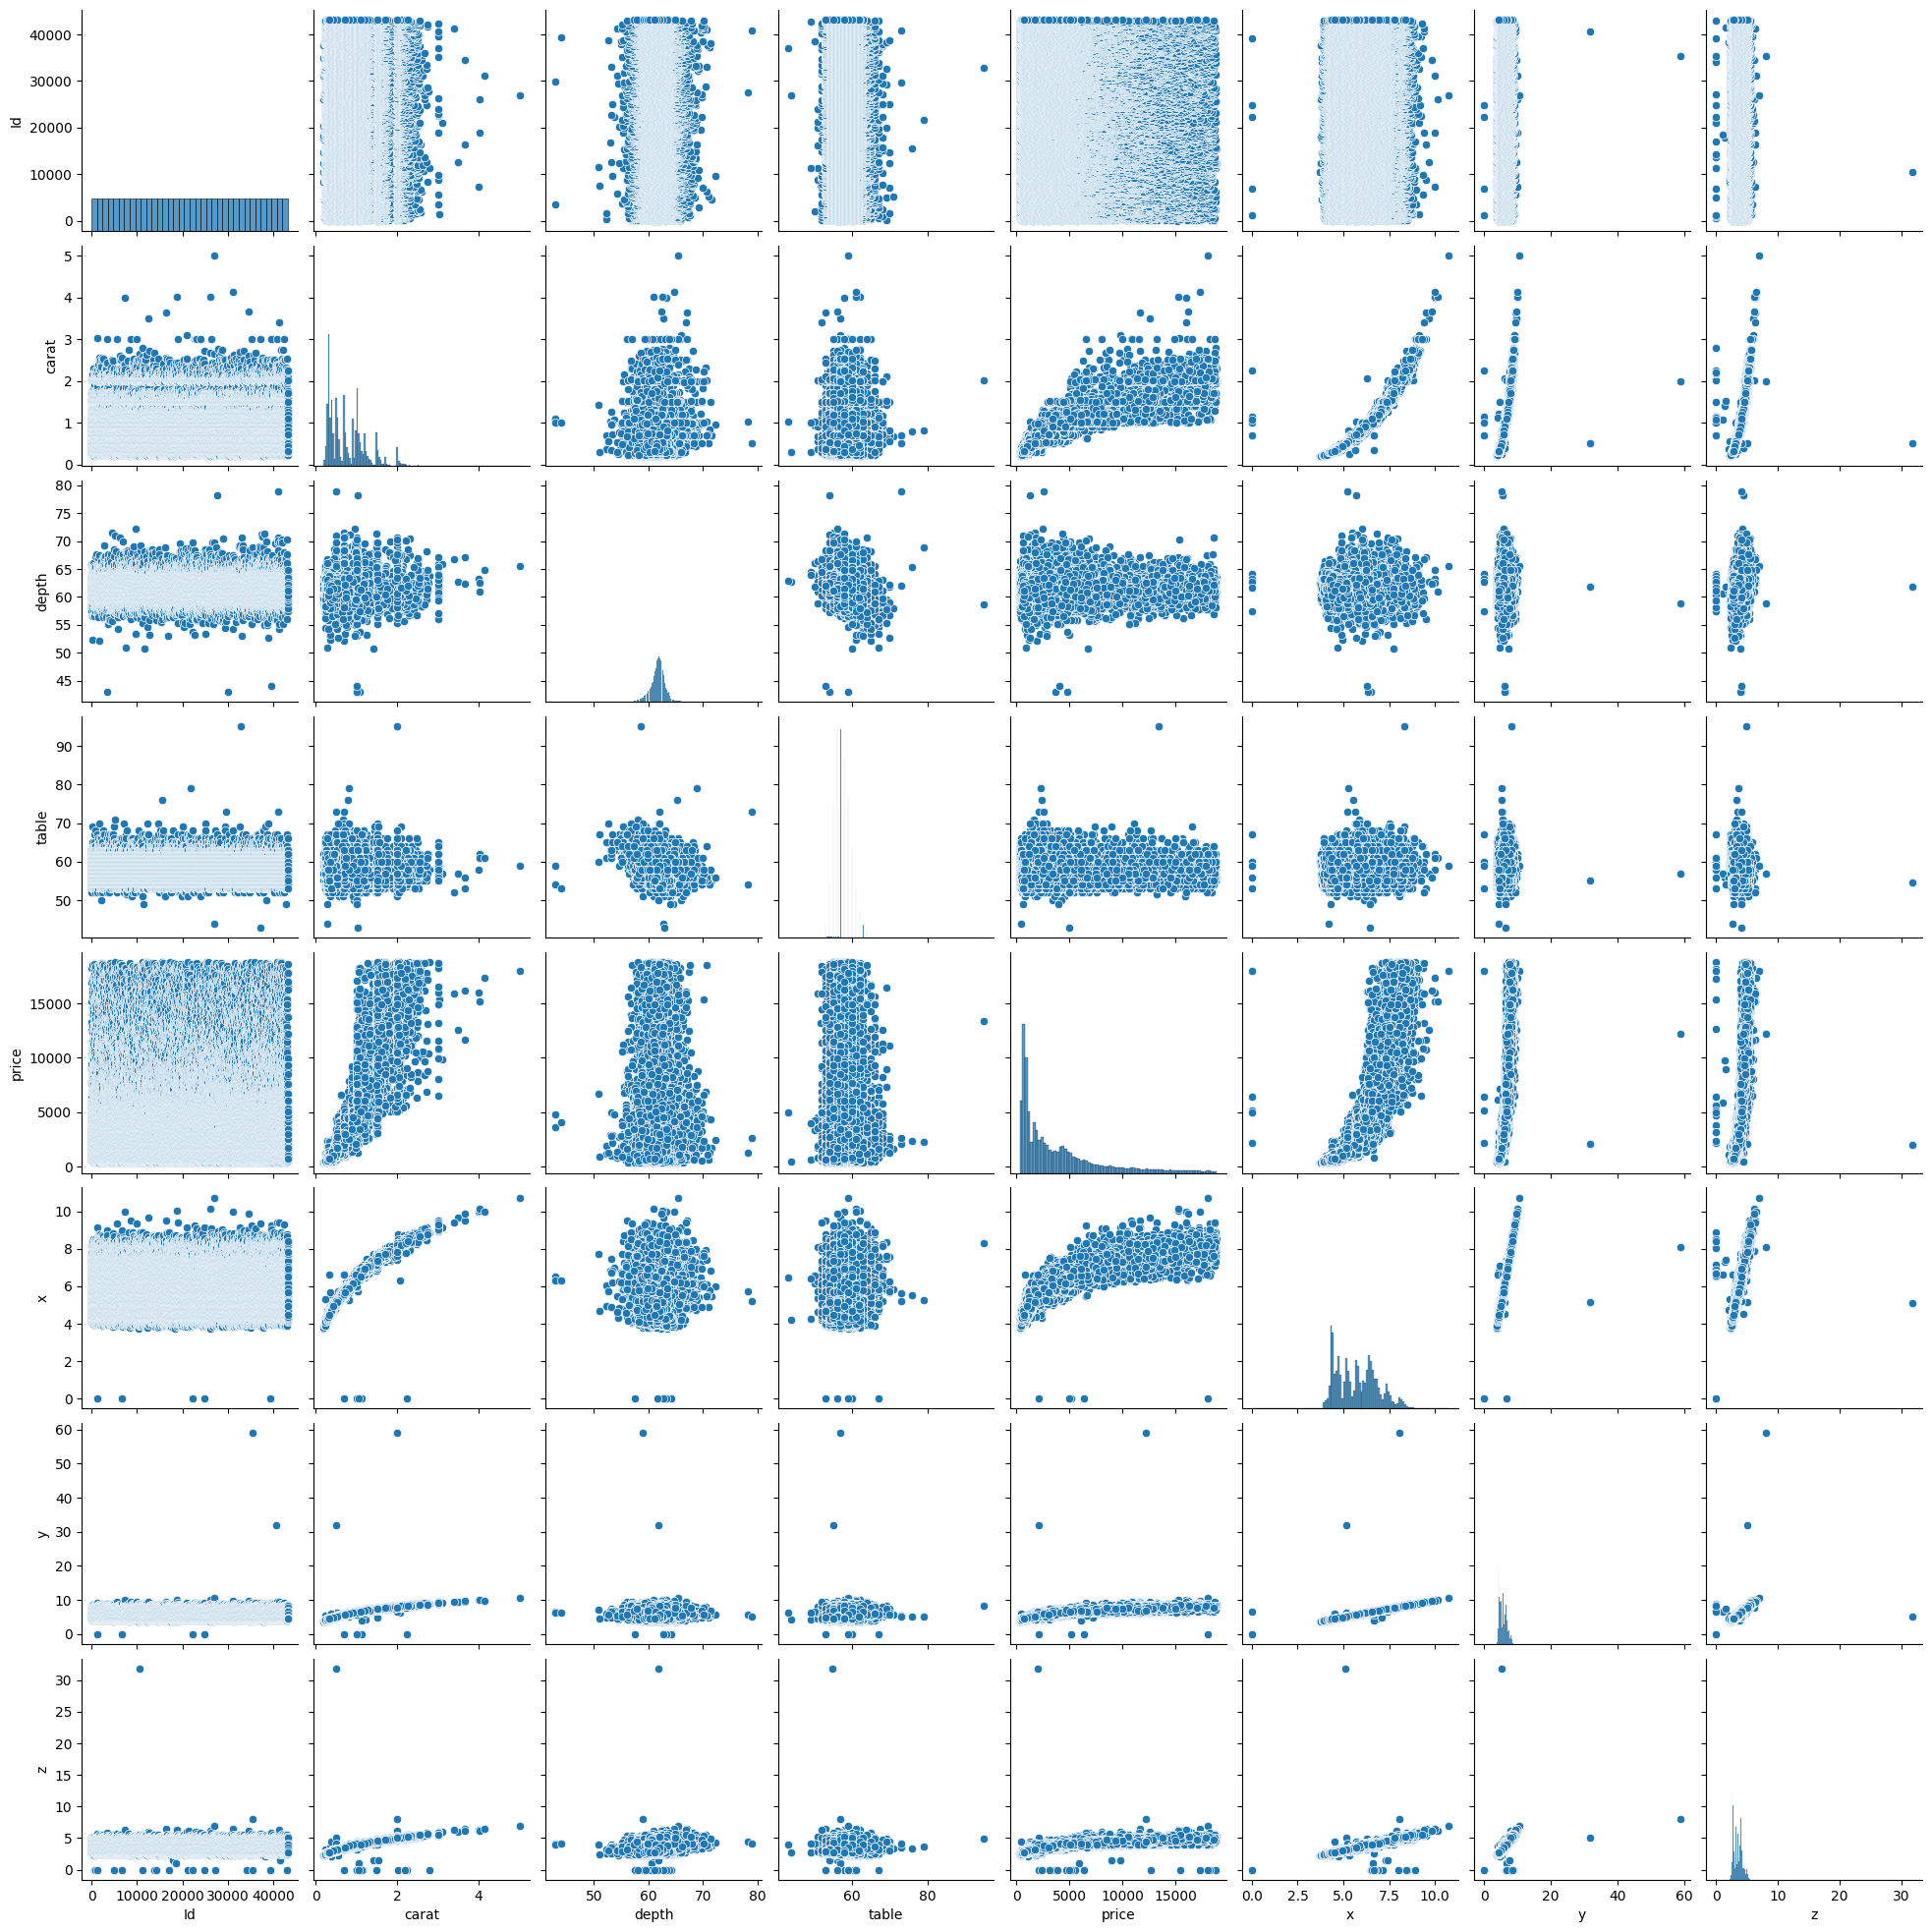

In [58]:
sns.pairplot(daimond)

<Axes: xlabel='carat', ylabel='price'>

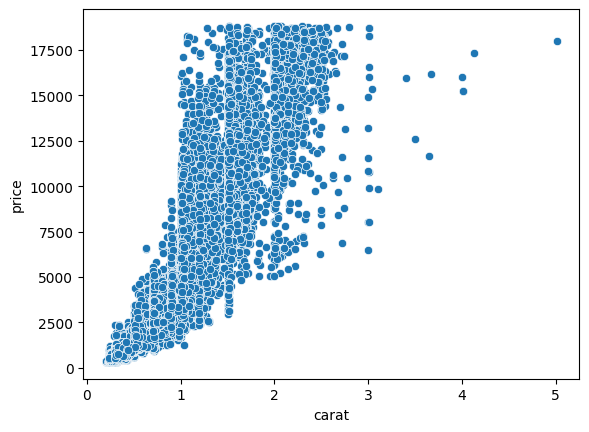

In [59]:
sns.scatterplot(x=daimond["carat"], y = daimond["price"])

<Axes: xlabel='x', ylabel='price'>

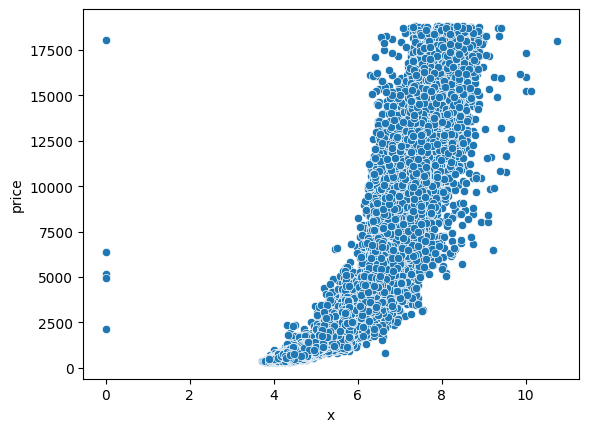

In [60]:
sns.scatterplot(x=daimond["x"], y = daimond["price"])

<Axes: xlabel='y', ylabel='price'>

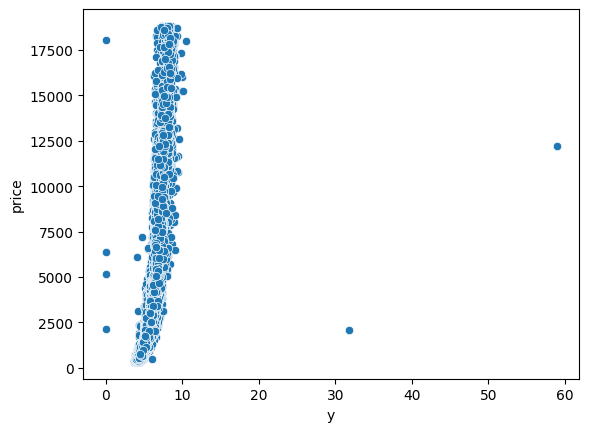

In [61]:
sns.scatterplot(x=daimond["y"], y = daimond["price"])

<ipython-input-62-879d8dd2fe59>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = daimond.corr()


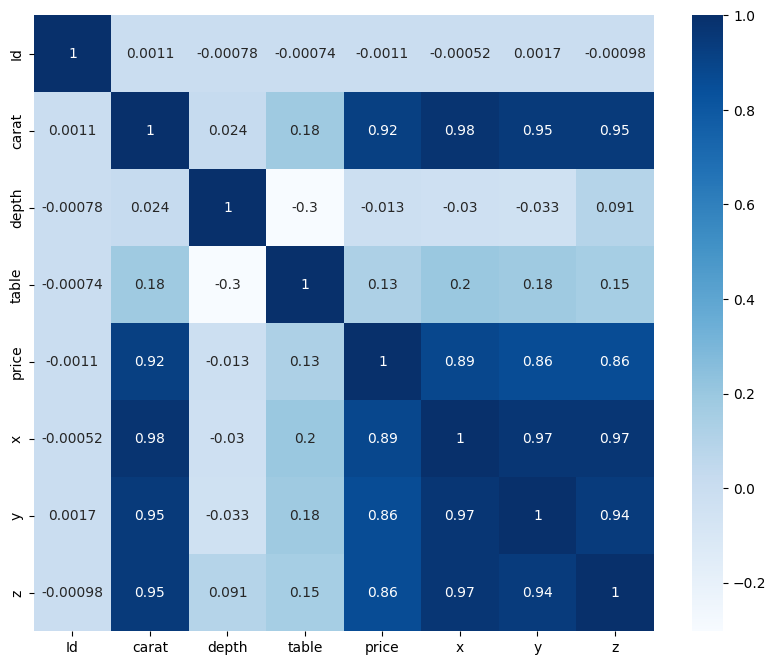

In [62]:
corr_matrix = daimond.corr()

plt.subplots(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = "Blues")
plt.show()


# **3- Prepare the data**

In [63]:
daimond.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [64]:
test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [65]:

test.drop('Id',inplace=True,axis=1)

In [66]:
test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [67]:
daimond.duplicated().sum() , test.duplicated().sum()

(0, 12)

In [68]:
daimond.drop_duplicates(inplace=True)

In [69]:
daimond.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [70]:
test.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [71]:
(daimond == 0).sum(axis=0)

Id          0
carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           5
y           4
z          17
dtype: int64

In [72]:
(test == 0).sum(axis=0)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          3
y          3
z          3
dtype: int64

# **B- Handling Outliers**

In [73]:
daimond = daimond[daimond['x'] < 9.2]
daimond = daimond[daimond['y'] < 30]
daimond = daimond[daimond['z'] < 30]
daimond = daimond[(daimond['table'] < 75) & (daimond['table'] > 45)]
daimond = daimond[(daimond['depth'] < 75) & (daimond['depth'] > 45)]

daimond.shape

(43120, 11)

In [74]:
daimond = (daimond[daimond.carat < 3])

In [75]:
num_attribs = list(daimond.dtypes[daimond.dtypes == 'float64'].index)
categorical_feats = list(daimond.dtypes[daimond.dtypes == 'object'].index)

In [76]:
encoder = OrdinalEncoder()
diamond_cat_encoded = encoder.fit_transform(daimond[categorical_feats])

diamond_cat_encoded[:10]

array([[2., 5., 3.],
       [3., 3., 7.],
       [2., 2., 5.],
       [2., 3., 5.],
       [3., 4., 7.],
       [4., 3., 1.],
       [4., 2., 4.],
       [2., 2., 2.],
       [2., 0., 4.],
       [4., 3., 6.]])

In [77]:
encoder.categories_

[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)]

In [78]:
daimond.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [79]:
def cat_enc(data):
  cat_to_enc = {'cut' : ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
              'color' : ['D', 'E', 'F', 'G', 'H', 'I', 'J'],
              'clarity' : ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}
  for col,cat in cat_to_enc.items():
    enc_dict = {v:i for i,v in enumerate(cat)}
    data[col].replace(enc_dict,inplace=True)
  return data

In [80]:
daimond = cat_enc(daimond)
daimond.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,4,5,1,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,3,3,5,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,4,2,3,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,4,3,3,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,3,4,5,61.0,57.0,2596,5.76,5.72,3.50


In [81]:
test = cat_enc(test)
test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.34,4,3,5,61.1,57.0,4.52,4.48,2.75
1,0.71,3,1,3,62.7,58.0,5.74,5.68,3.58
2,0.44,2,5,4,62.8,56.0,4.83,4.88,3.05
3,0.81,3,1,1,60.1,59.0,6.09,6.03,3.65
4,0.40,4,3,6,61.2,56.0,4.74,4.80,2.92


In [82]:
daimond['volume'] = daimond['x'] * daimond['y'] * daimond['z']

In [83]:
test['volume'] = test['x'] * test['y'] * test['z']

In [84]:
sc_daimonds = StandardScaler()
daimond[num_attribs] = sc_daimonds.fit_transform(daimond[num_attribs])
test[num_attribs] = sc_daimonds.transform(test[num_attribs])

In [85]:
daimond.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1,0.562036,4,5,1,0.037386,-0.205749,4270,0.752323,0.783339,0.771041,176.483340
1,2,1.520867,3,3,5,-0.596172,0.245069,15164,1.477044,1.522407,1.406595,246.965796
2,3,-1.014709,4,2,3,-0.314591,-0.656567,828,-1.162372,-1.190514,-1.193398,52.943373
3,4,-0.567254,4,3,3,-0.384986,-0.656567,1577,-0.482387,-0.460459,-0.500066,86.422842
4,5,-0.205029,3,4,5,-0.525776,-0.205749,2596,0.027602,-0.009807,-0.052290,115.315200


In [86]:
test.head()

,carat,cut,color,clarity,depth,table,x,y,z,volume
0,-0.972094,4,3,5,-0.455381,-0.205749,-1.081847,-1.127423,-1.135620,55.686400
1,-0.183722,3,1,3,0.670943,0.245069,0.009708,-0.045860,0.063265,116.719456
2,-0.759020,2,5,4,0.741338,-0.656567,-0.804485,-0.766902,-0.702288,71.889720
3,0.029352,3,1,1,-1.159333,0.695887,0.322859,0.269596,0.164376,134.037855
4,-0.844250,4,3,6,-0.384986,-0.656567,-0.885009,-0.839006,-0.890065,66.435840


In [87]:
train_set, test_set = train_test_split(daimond, test_size=0.2, random_state=42)

In [88]:

X_train = train_set.drop("price", axis=1)
y_train = train_set["price"]
X_test = test_set.drop("price", axis=1)
y_test = test_set["price"]